# Noise Generation

In [1]:
from terrain.noise import BlockRandomGenerator
from terrain.interpolation import NearestNeighborInterpolator

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown

## Block Random Generators
---

In [2]:
block_gen_default = BlockRandomGenerator(8, 2)
block_gen_normal = BlockRandomGenerator(8, 2, rv=np.random.normal)
block_gen_exponent = BlockRandomGenerator(8, 2, rv=np.random.exponential)
block_gen_power = BlockRandomGenerator(8, 2, rv=np.random.power, args=(4,))

### Uniform(0, 1)
---

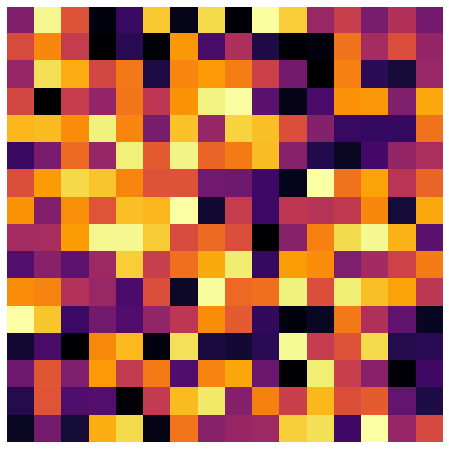

### Normal(0, 1)
---

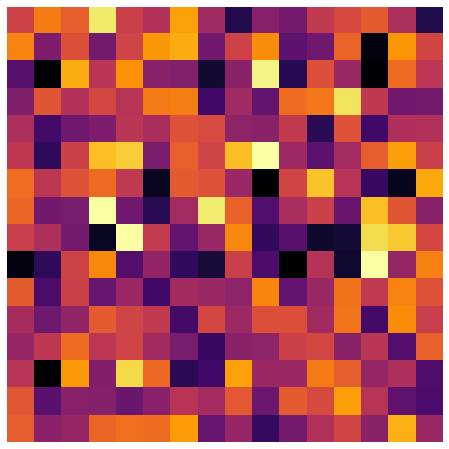

### Exponential(1)
---

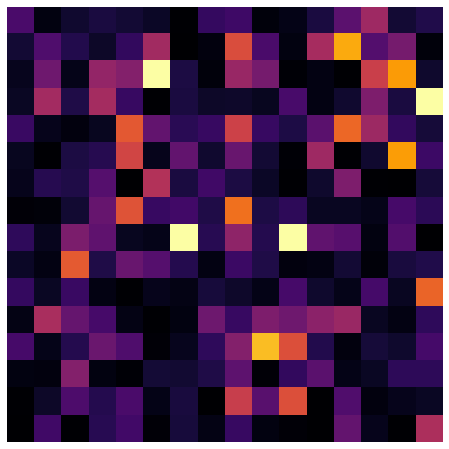

### Power(4)
---

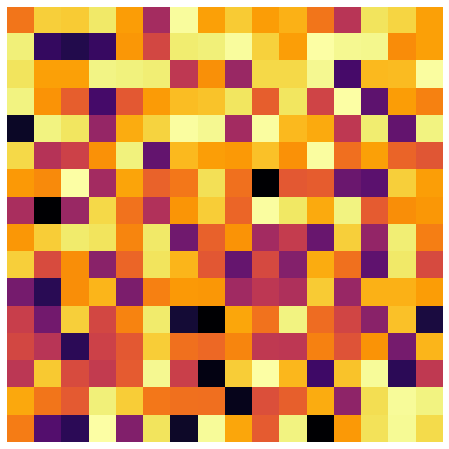

In [3]:
for gen, gen_name in zip([
    block_gen_default,
    block_gen_normal,
    block_gen_exponent,
    block_gen_power
], [
    "Uniform(0, 1)",
    "Normal(0, 1)",
    "Exponential(1)",
    "Power(4)"
]):
    display(Markdown(f"### {gen_name}\n---"))
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
    
    for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        axes[i, j].imshow(gen.generate_block((i, j)), cmap='inferno')
        axes[i, j].axis('off')
        
    plt.subplots_adjust(wspace=-0.05, hspace=0.0)
    plt.show()

## Interpolators
---

In [4]:
noise_block_gen = BlockRandomGenerator(16, 2, rv=np.random.normal)
noise = noise_block_gen.generate_block((0, 0))

In [5]:
interp_nearest = NearestNeighborInterpolator(noise)

interp_subdivisions = 4
interp_samples = np.vstack(tuple(map(np.ravel, np.meshgrid(
    np.linspace(0.0, 16.0, 16, endpoint=False),
    np.linspace(0.0, 16.0, 16, endpoint=False),
)))).astype(int).T
interp_subsamples = np.vstack(tuple(map(np.ravel, np.meshgrid(
    np.linspace(0.0, 16.0, 16 * interp_subdivisions, endpoint=False),
    np.linspace(0.0, 16.0, 16 * interp_subdivisions, endpoint=False)
)))).T

### Nearest Neighbors
---

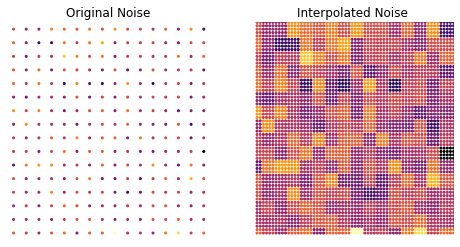

In [6]:
for interp, interp_name in zip([
    interp_nearest
], [
    "Nearest Neighbors"
]):
    noise_orig = noise[interp_samples[:, 0], interp_samples[:, 1]]
    noise_interp = interp(interp_subsamples)
    
    display(Markdown(f"### {interp_name}\n---"))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(8, 4))

    axes[0].scatter(interp_samples[:, 0], interp_samples[:, 1], s=4, c=noise_orig, cmap='inferno')
    axes[0].set_xlim(-0.5, 15.5)
    axes[0].set_ylim(-0.5, 15.5)
    axes[1].scatter(interp_subsamples[:, 0], interp_subsamples[:, 1], s=4, c=noise_interp, cmap='inferno')
    axes[1].set_xlim(-0.5, 15.5)
    axes[1].set_ylim(-0.5, 15.5)

    axes[0].set_title("Original Noise")
    axes[0].axis('off')
    axes[1].set_title("Interpolated Noise")
    axes[1].axis('off')

    plt.show()

In [7]:
# Import the noise generator class.
from terrain.noise import ScalarNoiseGenerator

# Import plotting utilities for visualizations.
from matplotlib import pyplot as plt
from mayavi import mlab

# IPython hint to make Mayavi scenes work.
%gui qt

I display the capabilities of the noise generator by creating a 2D noise generator and displaying the noise as a heightmap.

In [8]:
# Create a noise generator in 2 dimensions.
noise_gen = ScalarNoiseGenerator(dimension=2, trend_levels=8, smoothness=0.75)

In [9]:
surf_x = 0
surf_y = 0

noise = noise_gen.generate(index=[surf_x, surf_y], size=[256, 256])
surf_plot = mlab.surf(noise, warp_scale='auto', colormap='inferno')

@mlab.animate
def animate_surface():
    global surf_x, surf_y
    while True:
        noise = noise_gen.generate(index=[surf_x, surf_y], size=[256, 512])
        surf_plot.mlab_source.scalars = noise
        
        surf_x += 1
        yield
        
animate_surface()
mlab.show()

In [15]:
from terrain.interpolation import *

PolynomialInterpolator(np.random.rand(5, 5, 5), degree=(1, 3, 2))(np.array([[1.5, 1.5, 2.5]]))

[[1 0 2]]
[1.5 1.5 2.5]
()
[1, 2]
[[0 2]
 [1 2]
 [2 2]
 [0 3]
 [1 3]
 [2 3]]

[1.5 1.5 2.5]
(1.5,)
[0, 1, 2, 3]
[[2]
 [3]]



TypeError: expected x and y to have same length